In [243]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Import data

In [244]:
data = pd.read_csv('E:/workspace/python/scikitlearn/loan_prediction.csv', engine='python', error_bad_lines=False)
data.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [245]:
data = data.drop(columns=['LoanID'])
feature_columns = columns[:-1]
target_column = columns[-1]

In [246]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Find and Fill Missing Values

In [247]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

In [248]:
data.groupby(['LoanStatus', 'CreditHistory']).count()

Gender  Married  Dependents  Education  \
LoanStatus CreditHistory                                           
N          0.0                79       82          77         82   
           1.0                95       97          96         97   
Y          0.0                 7        7           7          7   
           1.0               371      375         369        378   

                          SelfEmployed  ApplicantIncome  CoapplicantIncome  \
LoanStatus CreditHistory                                                     
N          0.0                      81               82                 82   
           1.0                      94               97                 97   
Y          0.0                       7                7                  7   
           1.0                     356              378                378   

                          LoanAmount  LoanAmountTerm  PropertyArea  
LoanStatus CreditHistory                                            
N          0.0                    78              76            82  
           1.0                    91              97            97  
Y          0.0                     7               7             7  
           1.0                   367             370           378

In [249]:
data.loc[(data['LoanStatus'] == 'Y') & (data['CreditHistory'].isnull()), 'CreditHistory'] = 1.0

In [250]:
data.groupby(['LoanStatus', 'SelfEmployed', 'CreditHistory']).count()

Gender  Married  Dependents  Education  \
LoanStatus SelfEmployed CreditHistory                                           
N          No           0.0                66       69          64         69   
                        1.0                79       81          81         81   
           Yes          0.0                12       12          12         12   
                        1.0                13       13          12         13   
Y          No           0.0                 7        7           7          7   
                        1.0               332      333         328        336   
           Yes          1.0                52       56          55         56   

                                       ApplicantIncome  CoapplicantIncome  \
LoanStatus SelfEmployed CreditHistory                                       
N          No           0.0                         69                 69   
                        1.0                         81                 81   
           Yes          0.0                         12                 12   
                        1.0                         13                 13   
Y          No           0.0                          7                  7   
                        1.0                        336                336   
           Yes          1.0                         56                 56   

                                       LoanAmount  LoanAmountTerm  \
LoanStatus SelfEmployed CreditHistory                               
N          No           0.0                    66              63   
                        1.0                    75              81   
           Yes          0.0                    11              12   
                        1.0                    13              13   
Y          No           0.0                     7               7   
                        1.0                   327             331   
           Yes          1.0                    54              54   

                                       PropertyArea  
LoanStatus SelfEmployed CreditHistory                
N          No           0.0                      69  
                        1.0                      81  
           Yes          0.0                      12  
                        1.0                      13  
Y          No           0.0                       7  
                        1.0                     336  
           Yes          1.0                      56

In [251]:
data.loc[(data['LoanStatus'] == 'N') & (data['CreditHistory'].isnull()), 'CreditHistory'] = 0.0

In [252]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory         0
PropertyArea          0
LoanStatus            0
dtype: int64

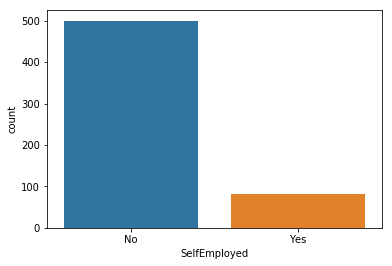

In [253]:
sns.countplot(data['SelfEmployed'])

In [254]:
data.loc[data['SelfEmployed'].isnull(), 'SelfEmployed'] = 'No'

In [255]:
data.loc[data['Gender'].isnull(), 'Gender'] = 'Male'

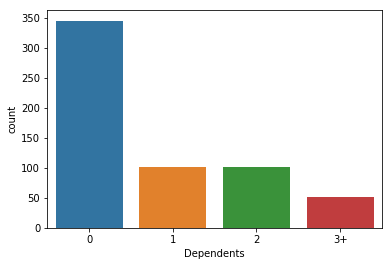

In [256]:
sns.countplot(data['Dependents'])

In [257]:
data['Dependents'].fillna(0, inplace=True)

In [258]:
data.isnull().sum()

Gender                0
Married               3
Dependents            0
Education             0
SelfEmployed          0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory         0
PropertyArea          0
LoanStatus            0
dtype: int64

In [259]:
data['Married'].fillna(method='ffill', inplace=True)

# Remove Outliers

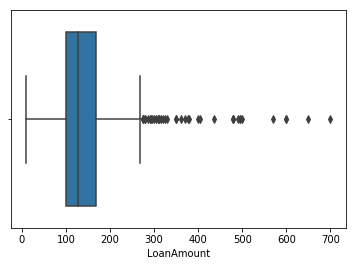

In [260]:
sns.boxplot(x='LoanAmount', data=data)

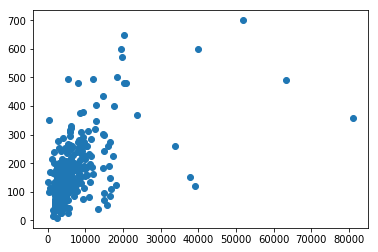

In [261]:
plt.scatter(x=data['ApplicantIncome'], y=data['LoanAmount'])

**remove points after ~25000 and above ~500**

In [262]:
zscores = np.abs(stats.zscore(data['ApplicantIncome']))
outlyingIndices = np.where(zscores > 3)
outlying_incomes = [data['ApplicantIncome'][x] for x in outlyingIndices]
outlyingIndices = outlyingIndices[0].tolist()

In [263]:
print(data.shape)
data = data.drop(outlyingIndices)
data.shape

(614, 12)


(606, 12)

In [264]:
print(data['LoanAmount'].mean())
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

print(data['LoanAmountTerm'].median())
data['LoanAmountTerm'].fillna(data['LoanAmountTerm'].median(), inplace=True)

143.1917808219178
360.0


In [265]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

**Encoding**

In [266]:
from sklearn.preprocessing import LabelEncoder

In [267]:
le = LabelEncoder()
data['Dependents'] = le.fit_transform(data['Dependents'].astype(str))
data['Education'] = le.fit_transform(data['Education'].astype(str))
data['SelfEmployed'] = le.fit_transform(data['SelfEmployed'].astype(str))
data['PropertyArea'] = le.fit_transform(data['PropertyArea'].astype(str))
data['LoanStatus'] = le.fit_transform(data['LoanStatus'].astype(str))

In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

X = data[['Dependents', 'Education', 'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm', 
         'CreditHistory', 'PropertyArea']]
y = data['LoanStatus']

scores = cross_val_score(RandomForestClassifier(n_estimators=5), X=X, y=y, cv=5)
print(scores)
scores.mean()

[0.82786885 0.71900826 0.7768595  0.80165289 0.76033058]


0.7771440184256877

In [269]:
# checking trasining accuracy for overfitting
rfc_train_acc = RandomForestClassifier(n_estimators=5)
rfc_train_acc.fit(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y)
y_pred = rfc_train_acc.predict(X)
accuracy_score(y, y_pred)

0.971947194719472

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
rfc2 = RandomForestClassifier(n_estimators=5)
rfc2.fit(X_train, y_train)
y_pred = rfc2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29, 13],
       [13, 97]], dtype=int64)

In [271]:
print('precision:', precision_score(y_test, y_pred), 'recall:', recall_score(y_test, y_pred))

precision: 0.8818181818181818 recall: 0.8818181818181818


# Normalization

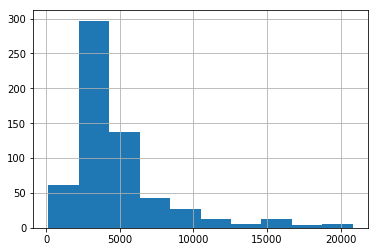

In [272]:
data['ApplicantIncome'].hist()

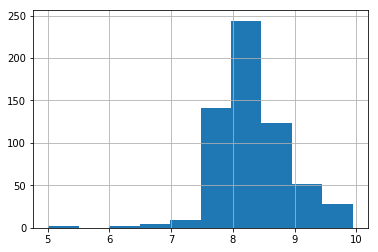

In [273]:
temp = np.log(data['ApplicantIncome'])
temp.hist()

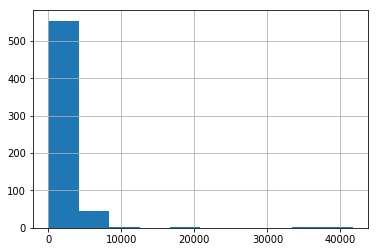

In [274]:
data['CoapplicantIncome'].hist()

In [275]:
data['CoapplicantIncome'][data['CoapplicantIncome'] <= 0].value_counts()

0.0    266
Name: CoapplicantIncome, dtype: int64

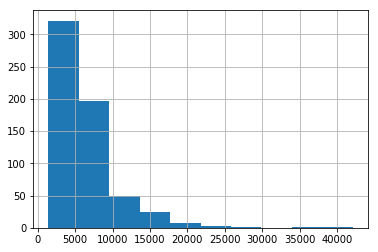

In [276]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome'].hist()

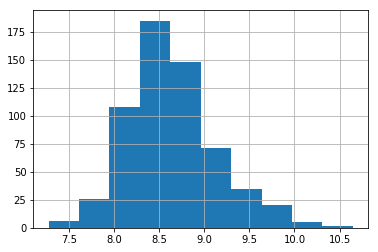

In [277]:
data['TotalIncome'] = np.log(data['TotalIncome'])
data['TotalIncome'].hist()

In [278]:
data = data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'])

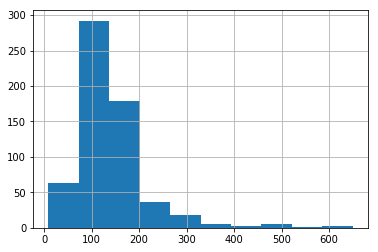

In [279]:
data['LoanAmount'].hist()

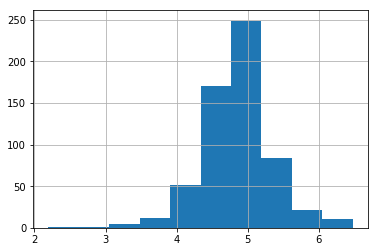

In [280]:
data['LoanAmount'] = np.log(data['LoanAmount'])
data['LoanAmount'].hist()

In [281]:
X = data[['Dependents', 'Education', 'SelfEmployed', 'TotalIncome', 'LoanAmount', 'LoanAmountTerm', 'CreditHistory', 
          'PropertyArea']]
y = data['LoanStatus']

scores = cross_val_score(RandomForestClassifier(n_estimators=5), X=X, y=y, cv=5)
print(scores)
scores.mean()

[0.78688525 0.76033058 0.80165289 0.80165289 0.80991736]


0.7920877929819807

In [282]:
# checking trasining accuracy for overfitting
rfc_train_acc = RandomForestClassifier(n_estimators=5)
rfc_train_acc.fit(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y)
y_pred = rfc_train_acc.predict(X)
accuracy_score(y, y_pred)

0.9702970297029703

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
rfc2 = RandomForestClassifier(n_estimators=5)
rfc2.fit(X_train, y_train)
y_pred = rfc2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29, 23],
       [ 7, 93]], dtype=int64)

In [284]:
print('precision:', precision_score(y_test, y_pred), 'recall:', recall_score(y_test, y_pred))

precision: 0.8017241379310345 recall: 0.93
